Encoding and decoding using deep autoencoder (Shabd dataset - Kaggle)

single fully-connected neural layer as encoder and as decoder.

Create a deep autoencoder where the input image has a dimension of 1024. 
Encode it to a dimension of 128 and then to 64 and then to 32. 
Decode the 32 dimension image to 64 and then to 128 and finally reconstruct back to original dimension of 1024.

In [1]:
from keras.layers import Input ,Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading the shabd dataset images. We want to reconstruct the images as output of the autoencoder.
Normalize all values between 0 and 1 and we will flatten the 32x32 images into vectors of size 1024.

In [2]:
trainData= pd.read_csv("train(grayscale).csv")
testData= pd.read_csv("test(grayscale).csv")

print("Train Data Shape: ",trainData.shape)
print("Test Data Shape: ",testData.shape)

Train Data Shape:  (243456, 1026)
Test Data Shape:  (60672, 1026)


In [3]:
trainData.head()

,Index,label,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,f_1024
0,83,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,620,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,508,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,497,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,679,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [4]:
testData.head()

,Index,label,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,f_1024
0,12,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,27,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,30,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,33,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,36,अ,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [5]:
Y_train=trainData["label"]
X_train=trainData.drop(labels=["label","Index"],axis=1)

print(X_train.shape)

Y_test=testData["label"]
X_test=testData.drop(labels=["label","Index"],axis=1)

print(X_test.shape)

(243456, 1024)
(60672, 1024)


Normalize all values between 0 and 1 and we will flatten the 32x32 images into vectors of size 1024.

In [6]:
X_train=X_train/255.0
X_test=X_test/255.0

In [7]:
X_train=X_train.values.reshape(len(X_train),np.prod(X_train.shape[1:]))
X_test=X_test.values.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(243456, 1024)
(60672, 1024)


Convert the input image of dimensions 1024 to keras tensors

In [8]:
input_img= Input(shape=(1024,))
input_img

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'input_1')>

To build the autoencoder we will have to first encode the input image and add different encoded and decoded layer to build the deep autoencoder as shown below. The output layer needs to predict the probability of an output which needs to either 0 or 1 and hence we use sigmoid function.
For all the hidden layers for the encoder and decoder we use relu activation function for non-linearity.


In [9]:
encoding_dim=32
# "encoded" is the encoded representation of the input
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded) 
encoded = Dense(units=encoding_dim, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)

decoded = Dense(units=128, activation='relu')(decoded)
#reconstruct the image using sigmoid activation function
decoded = Dense(units=1024, activation='sigmoid')(decoded)

In [10]:
autoencoder=Model(input_img, decoded)

View the structure of deep autoencoder model

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 1024)              132096

In [12]:
encoder = Model(input_img, encoded)

Structure of encoder model

In [13]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 141,536
Trainable params: 141,536
Non-trainable params: 0
_________________________________________________________________


In [14]:
# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(32,))
# retrieve the last layer of the autoencoder model 
num_decoder_layers = 3
decoder_layer = encoded_input
for i in range(-num_decoder_layers, 0):
    decoder_layer = autoencoder.layers[i](decoder_layer)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

Structure of decoder model

In [15]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 1024)              132096    
                                                                 
Total params: 142,528
Trainable params: 142,528
Non-trainable params: 0
_________________________________________________________________


Compile the autoencoder model with adam optimizer uisng binary_crossentropy as the loss function. (pixels 0,1)
We use accuracy as the metrics used for the performance of the model.

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the autoencoder using the training data with 50 epochs and batch size of 256

In [17]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
951/951 [==============================] - 32s 32ms/step - loss: 0.2600 - accuracy: 5.8738e-04 - val_loss: 0.2370 - val_accuracy: 1.6482e-05
Epoch 2/50
951/951 [==============================] - 29s 30ms/step - loss: 0.2320 - accuracy: 2.3824e-04 - val_loss: 0.2279 - val_accuracy: 6.4280e-04
Epoch 3/50
951/951 [==============================] - 22s 23ms/step - loss: 0.2258 - accuracy: 0.0055 - val_loss: 0.2237 - val_accuracy: 0.0133
Epoch 4/50
951/951 [==============================] - 22s 23ms/step - loss: 0.2221 - accuracy: 0.0073 - val_loss: 0.2204 - val_accuracy: 0.0150
Epoch 5/50
951/951 [==============================] - 21s 22ms/step - loss: 0.2194 - accuracy: 0.0110 - val_loss: 0.2183 - val_accuracy: 0.0194
Epoch 6/50
951/951 [==============================] - 22s 23ms/step - loss: 0.2176 - accuracy: 0.0192 - val_loss: 0.2165 - val_accuracy: 0.0202
Epoch 7/50
951/951 [==============================] - 26s 27ms/step - loss: 0.2161 - accuracy: 0.0199 - val_loss: 0.2153

Predicting the test set using autoencoder to obtain the reconstructed image. Predict the test using the encoder to view the encoded images.

In [18]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

To view the original input, encoded images and the reconstructed images, we plot the images using matplotlib

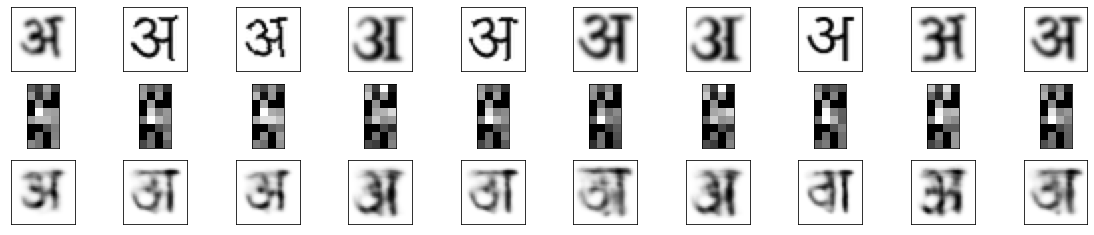

In [40]:
plt.figure(figsize=(40, 4))
for i in range(10):

    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()